In [1]:
!pip install paho.mqtt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 99 kB 3.7 MB/s 
  Created wheel for paho.mqtt: filename=paho_mqtt-1.6.1-py3-none-any.whl size=62133 sha256=728291de1035bc4ba0b613f76b58218320b5820d3472c831a2fc31b16f9cbf32
  Stored in directory: /root/.cache/pip/wheels/d0/bf/ac/2b3f43f8c6fcd0f4ba5395397458c521eb0b52d33b574a5a40
Successfully built paho.mqtt


In [2]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 4.2 MB/s 
     |████████████████████████████████| 950 kB 42.7 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [3]:
import pickle, matplotlib.pyplot as plt, numpy as np, pandas as pd, seaborn as sns, requests, json, paho.mqtt.subscribe as subscribe, statsmodels.api as sm
from pathlib import Path
from statsmodels.graphics import tsaplots 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pd.options.display.float_format = '{:,.1f}'.format

# **Data aquisition - requests**

In [ ]:
import requests

# count=3 the last 3 entries from a device
r = requests.get("https://demo.datacamp.com/api/temp?count=3") 
print(r.json())

{'message': 'no Route matched with those values'}


จริงๆ ควรออกมาเป็นแบบนี้

```
[{'timestamp': 1536924000000, 'value': 22.3},
{'timestamp': 1536924600000, 'value': 22.8},
{'timestamp': 1536925200000, 'value': 23.3}]
```



In [ ]:
print(pd.DataFrame(r.json()).head())



```
timestamp value
0 1536924000000 22.3
1 1536924600000 22.8
2 1536925200000 23.3
```

# **Data aquisition - pandas**



In [ ]:
df_env = pd.read_json("https://demo.datacamp.com/api/temp?count=3")
print(df_env.head())



```
timestamp value
0 2018-09-14 11:20:00 22.3
1 2018-09-14 11:30:00 22.8
2 2018-09-14 11:40:00 23.3
```



### ***Data acquisition***

Let's get our first set of IoT data.

You will get started by consuming an environmental API provided by a public community. The API consists of multiple endpoints, and you will start by consuming the temperature data. The data is in 10-minute intervals and limited historical data is available.

You will use **`requests`** to download the last 5 records. Since the endpoint provides **`json`** encoded data, you can use **`.json()`** on the response object to get a python object (in this case a list).

Then you convert the list to a pandas DataFrame to be able to easily work with the data.

The constant `URL` to consume data from has been defined for you.

* Download data from URL using **`requests`** and store the result in `res`.
* Convert the JSON-encoded result res into a python object and store the result in `data_temp`.
* Convert `data_temp` into a pandas DataFrame `df_temp`.

In [ ]:
URL = 'https://assets.datacamp.com/production/repositories/4296/datasets/8f6b478697a8d05e10b7d535af67154549a4f38f/environ_MS83200MS_airtemp_600_30r.json'

# Download data from URL
res = requests.get(URL)

# Convert the result
data_temp = res.json()
print(data_temp)

# Convert json data to DataFrame
df_temp = pd.DataFrame(data_temp)

print(df_temp.head())

[{'timestamp': 1535764800000, 'value': 15.8}, {'timestamp': 1535765400000, 'value': 15.7}, {'timestamp': 1535766000000, 'value': 15.7}, {'timestamp': 1535766600000, 'value': 15.6}, {'timestamp': 1535767200000, 'value': 15.7}, {'timestamp': 1535767800000, 'value': 15.7}, {'timestamp': 1535768400000, 'value': 15.8}, {'timestamp': 1535769000000, 'value': 15.7}, {'timestamp': 1535769600000, 'value': 15.9}, {'timestamp': 1535770200000, 'value': 15.7}, {'timestamp': 1535770800000, 'value': 15.6}, {'timestamp': 1535771400000, 'value': 15.4}, {'timestamp': 1535772000000, 'value': 15.4}, {'timestamp': 1535772600000, 'value': 15.2}, {'timestamp': 1535773200000, 'value': 14.6}, {'timestamp': 1535773800000, 'value': 14.5}, {'timestamp': 1535774400000, 'value': 14.4}, {'timestamp': 1535775000000, 'value': 14.2}, {'timestamp': 1535775600000, 'value': 14.2}, {'timestamp': 1535776200000, 'value': 14.2}, {'timestamp': 1535776800000, 'value': 14.2}, {'timestamp': 1535777400000, 'value': 14.1}, {'timesta

### ***Acquire data with pandas***

As you just saw, consuming the public API, converting the data and transforming this into a DataFrame required multiple lines of code.

This can be simplified by using pandas' **`pd.read_json()`**, which handles the above steps for you.

* Read the data from `URL` directly into the DataFrame `df_temp`.


In [ ]:
# Load URL to DataFrame
df_temp = pd.read_json(URL)

# Print first 5 rows
print(df_temp.head(), "\n")

# Print datatypes
print(df_temp.dtypes)

            timestamp  value
0 2018-09-01 01:20:00  15.80
1 2018-09-01 01:30:00  15.70
2 2018-09-01 01:40:00  15.70
3 2018-09-01 01:50:00  15.60
4 2018-09-01 02:00:00  15.70 

timestamp    datetime64[ns]
value               float64
dtype: object


Did you notice that the datatype for `"timestamp"` was automatically converted to a **`datetime64`**?

# **Store data using pandas**

In [ ]:
df_env = pd.read_json('https://assets.datacamp.com/production/repositories/4296/datasets/8f6b478697a8d05e10b7d535af67154549a4f38f/environ_MS83200MS_airtemp_600_30r.json')

df_env.to_json('data.json', orient='records')

# **Reading the stored data**



In [ ]:
pd.read_json('data.json').head()

,timestamp,value
0,2018-09-01 01:20:00,15.80
1,2018-09-01 01:30:00,15.70
2,2018-09-01 01:40:00,15.70
3,2018-09-01 01:50:00,15.60
4,2018-09-01 02:00:00,15.70


### ***Store data***

After consuming an API endpoint, it's often desirable to store the data to disk.

Some of the reasons we might want to store data are:

* archive reproducible results
* train ML Models

You will now consume the same api as you did in previous exercises, but this time you will store the data in both JSON and CSV format.

After running this code you can also verify the data you saved using **`!head`** `filename`.

`URL` has been defined for you.

* Load json data from `URL` and store it in the variable `df`.
* Store the data in JSON format as file `"temperature.json"`, using `"records"` orientation.
* Store `df_temp` with the filename `"temperature.csv"` as CSV without index.

In [ ]:
URL = 'https://assets.datacamp.com/production/repositories/4296/datasets/8f6b478697a8d05e10b7d535af67154549a4f38f/environ_MS83200MS_airtemp_600_30r.json'

# Load URL to DataFrame
df_temp = pd.read_json(URL)

# Save DataFrame as json
df_temp.to_json('temperature.json', orient='records')

# Save DataFrame as csv without index
df_temp.to_csv('temperature.csv', index=False)

You can also verify the data you saved using **`!head filename`**.

### ***Read data from file***

The data you will work with now includes additional columns about the environment like humidity and air pressure. All data can be consumed seperately from the public API.

After having acquired and saved the data to disk, you should have a look at what was actually downloaded and stored.

You'll now load the data from JSON, print the head and look at the DataFrame summary.

* Read the JSON file `"environ_MS83200MS_nowind_3m-10min.json"` to `df_env` and print the head and information about the DataFrame.

In [ ]:
# Read file
df_env = pd.read_json('environ_MS83200MS_nowind_3m-10min.json')

# Print head
print(df_env.head())

# Print DataFrame info
print(df_env.info())

            timestamp  precipitation  humidity  radiation  sunshine  pressure  \
0 2018-09-01 00:00:00            0.0      95.6        0.0     599.2   1,016.3   
1 2018-09-01 00:05:00            0.1       NaN        NaN       NaN       NaN   
2 2018-09-01 00:10:00            0.0      95.5        0.0     600.0   1,016.4   
3 2018-09-01 00:15:00            0.0       NaN        NaN       NaN       NaN   
4 2018-09-01 00:20:00            0.0      95.2        0.0     598.9   1,016.5   

   temperature  
0         16.1  
1          NaN  
2         16.1  
3          NaN  
4         16.1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26175 entries, 0 to 26174
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      26175 non-null  datetime64[ns]
 1   precipitation  26162 non-null  float64       
 2   humidity       13085 non-null  float64       
 3   radiation      13085 non-null  float64     

Did you notice that **`read_json()`** is parsing the `timestamp` for us, while we need to specify this for the CSV file?

# **Single message**

In [ ]:
import paho.mqtt.subscribe as subscribe

msg = subscribe.simple("paho/test/simple", hostname="test.mosquitto.org")
print(f"{msg.topic}, {msg.payload}")

`paho/test/simple, {"time": 1549481572, "humidity": 77, "temp": 21}`

# **Callback**

In [ ]:
def on_message(client, userdata, message):
    print(f"{message.topic} : {message.payload}")



*   `client` - client instance
*   `userdata` - private user data
*   `message` - instance of MQTT Message



# **Connect our function to an MQTT topic**

In [ ]:
import paho.mqtt.subscribe as subscribe

subscribe.callback(on_message, 
                   topics="datacamp/roomtemp", 
                   hostname="test.mosquitto.org")

# **MQTT Subscribe**

MQTT is an efficient messaging protocol consisting of clients and brokers, which is often used in conjunction with IOT data streams.

In [ ]:
import paho.mqtt.subscribe as subscribe

def on_message(client, userdata, message):
    print("{} : {}".format(message.topic, message.payload))

subscribe.callback(on_message, 
                   topics="datacamp/roomtemp",
                   hostname="test.mosquitto.org")

### ***MQTT single message***

Imagine the following scenario: You have been given an MQTT Broker address and a topic name, and you are supposed to write some code to store the contents of the Datastream.

First, you should check what format the messages will be in by consuming a single message.

You can then print and inspect the message to determine how to process the data further.

This will be our basis for the next exercise, where we will be subscribing to the data stream and collecting multiple messages.

* Import the MQTT library **`paho.mqtt.subscribe`** as `subscribe`.
* Retrieve one message from the topic `"datacamp/iot/simple"` and store the result as `msg`.
* Print topic and payload from the message, separated by a comma.

In [ ]:
# Import mqtt library
import paho.mqtt.subscribe as subscribe

# Retrieve one message
msg = subscribe.simple('datacamp/iot/simple', hostname="mqtt.datacamp.com")

# Print topic and payload
print(f"{msg.topic}, {msg.payload}")



```
datacamp/iot/simple, {"timestamp": 1660489916, "humidity": 60, "temperature": 21}
```

This is very useful to quickly verify what type of data a topic contains, or if the topic contains data at all.

### ***Save Datastream***

You will now take an MQTT Data stream and append each new data point to the list store.

Using the library **`paho.mqtt`**, you can subscribe to a data stream using **`subscribe.callback()`**.

Each new message will result in one call to our function, which is required to have the following arguments:

* `client`, the client instance for this callback
* `userdata`, the private user data set when creating the instance
* `message`, an instance of MQTTMessage. For this exercise, `payload` is the only attribute we're interested in.

You need to parse the data as JSON string using **`json.loads()`** and append it the list store. You'll then convert this to a DataFrame and store the DataFrame as CSV file.

`json`, `pandas` as `pd`, `MQTT_HOST` and `topic` are available in your session.

* Create a function `on_message` with the required parameters.
* Parse the `message.payload` as JSON and append it to the list data.
* Connect the function you just defined to the MQTT stream for the variable topic using **`subscribe.callback()`**.
* Store the DataFrame `df` without index as csv file `"datastream.csv"`.

In [ ]:
MQTT_HOST, topic, store = 'testmqtt.datacamp.com', 'paho/test/iot_course', []

# Define function to call by callback method
def on_message(client, userdata, message):
    # Parse the message.payload
    data = json.loads(message.payload)
    store.append(data)

# Connect function to mqtt datastream
subscribe.callback(on_message, topics=topic, hostname=MQTT_HOST)

df = pd.DataFrame(store)
print(df.head())

# Store DataFrame to csv, skipping the index
df.to_csv('datastream.csv', index=False)



```
             timestamp       category  value
    0  1544918402292000000      temp   23.3
    1  1544918402292000000  humidity   20.2
    2  1544918402298000000  humidity   24.7
    3  1544918402298000000      temp   23.0
    4  1544918407290000000      temp   23.3
```



# **Line plot**

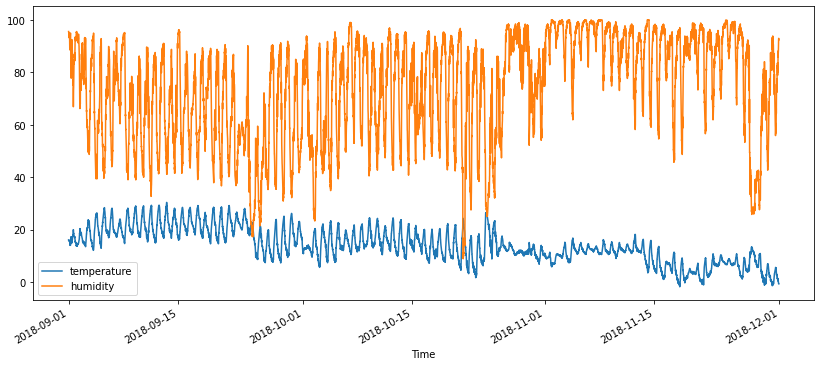

In [ ]:
df = pd.read_json('environ_MS83200MS_nowind_3m-10min.json').set_index('timestamp')

fig, ax = plt.subplots(figsize=(14, 6))
df[["temperature", "humidity"]].dropna().plot(ax=ax)
plt.xlabel("Time")
plt.show()

# **Secondary y**

* ใช้คีย์เวิร์ด **`ylabel=`** เพื่อตั้งชื่อแกนทางซ้าย
* ใช้ **`plt.ylabel()`** เพื่อตั้งชื่อแกนทางขวา

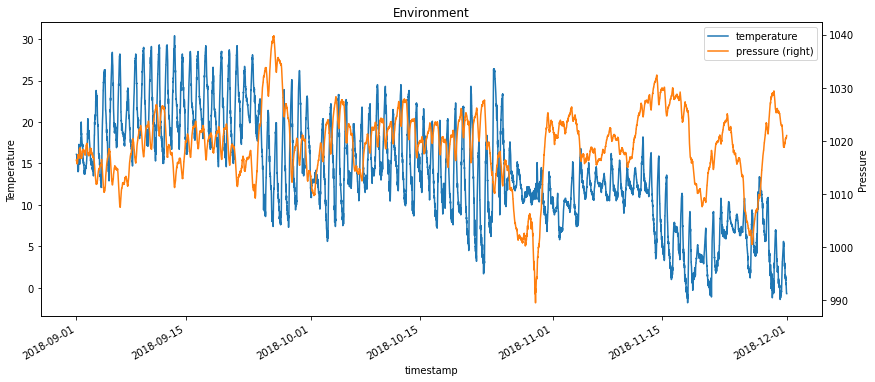

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
df[["temperature", "pressure"]].dropna().plot(title="Environment", secondary_y="pressure", ylabel='Temperature', ax=ax)
plt.ylabel('Pressure')
plt.show()

# **Histograms**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


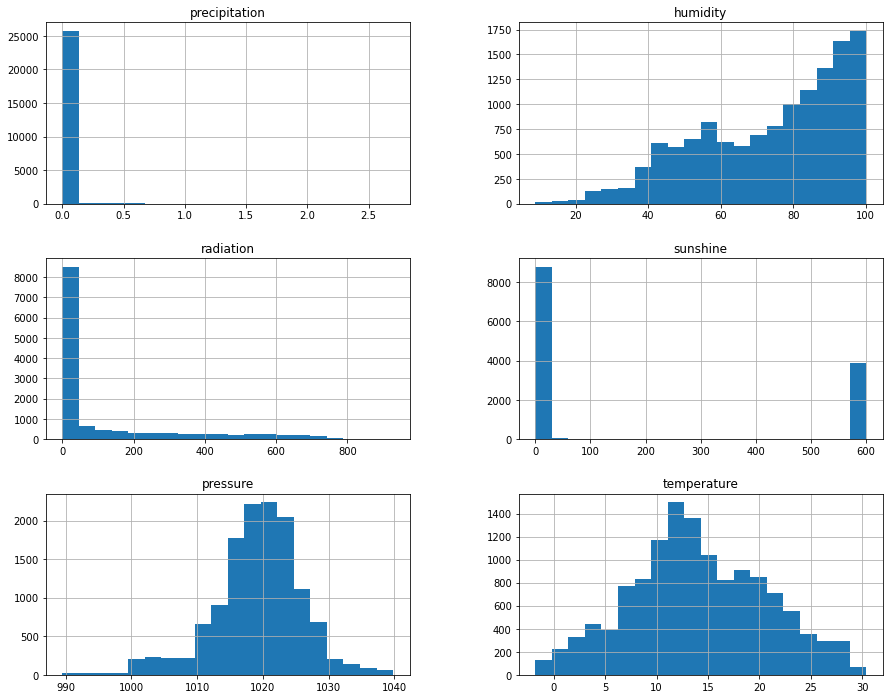

In [ ]:
fig, ax = plt.subplots(figsize=(15, 12))
df.hist(bins=20, ax=ax)
plt.show()

### ***Missing data II***

While analyzing data, you should be aware of any long, connected periods without data, as this can influence your results.

While you can fill columns with missing data, such methods did not reveal if no data is present for a period of time.

In this exercise, you'll search for periods of time without data, and you'll try to detect them visually in a line graph.

* Calculate and print the sum of NA values from the DataFrame data.
* Resample the DataFrame to `"10min"`.  Calculate the NA values per column again.
* Plot the resampled DataFrame to try and detect the gap in values.

In [ ]:
data = pd.read_json('environ_MS83200MS_nowind_3m-10min.json').set_index('timestamp')

# Calculate and print NA count
print(data.isna().sum())

# Resample data
data_res = data.resample("10min").last()

# Calculate and print NA count
print(data_res.isna().sum())

# Plot the DataFrame
data_res[['temperature', 'humidity']].plot(ax=ax)
plt.show()

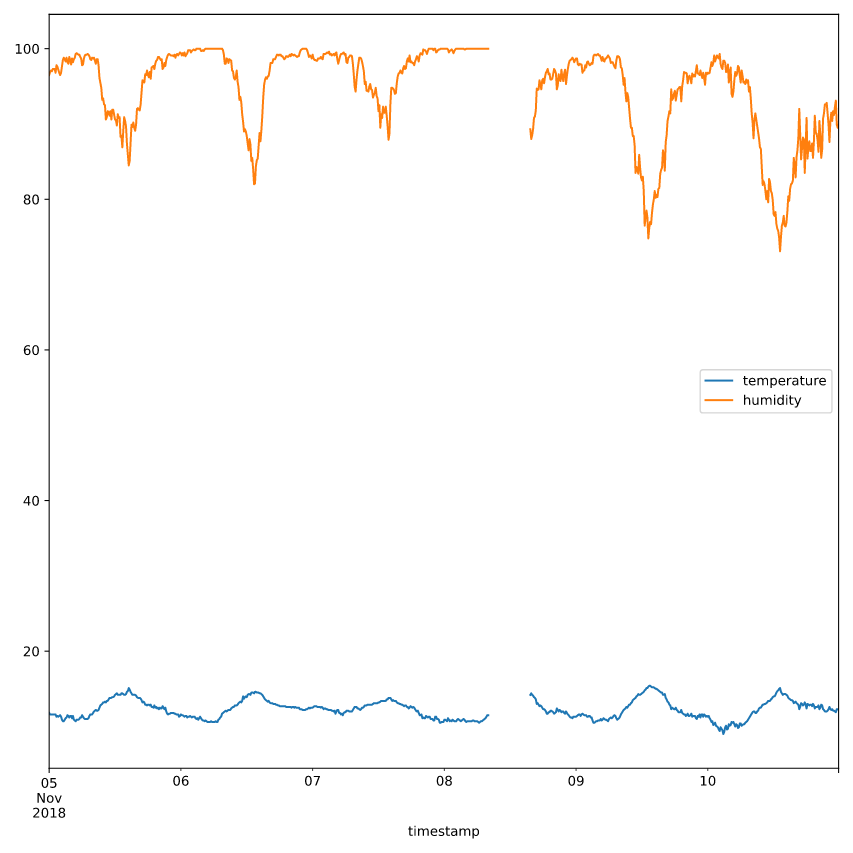

It seems like data collection was interrupted on November 8th, between 9am and 2pm.

# **Caching (ค่อยๆเก็บข้อมูลมาทีละนิดๆ)**

* Keep a few records in memory and save the whole cache to disk every *X* observations.

In [ ]:
import paho.mqtt.subscribe as subscribe
cache = []

def on_message(client, userdata, message):
    data = json.loads(message.payload) # รับข้อมูลเข้ามา
    cache.append(data) 
    if len(cache) > MAX_CACHE: # ถ้าข้อมูลมากถึงระดับนึงก็เขียนเก็บใส่ไฟล์
        with Path("data.txt").open("a") as f:
            f.writelines(cache)
        cache.clear()

# Connect function to mqtt datastream
subscribe.callback(on_message, topics="datacamp/energy", hostname=MQTT_HOST)

# **Observation Timestamp**

* ถ้าเครื่องมือที่ไปดูดข้อมูลมามี timestamp ให้แล้วก็ใช้ของมัน
* ถ้าไม่มีให้ ให้ใช้เวลาที่ดูดข้อมูลมาเป็น **`message.timestamp`**
* ถ้าใช้ไม่ได้ทั้งสองอย่างให้ใช้ **`datetime.now()`**

In [ ]:
def on_message(client, userdata, message):
    publishtime = message.timestamp
    consume_time = datetime.utcnow()

# **`pd.to_datetime()`**

* จะเห็นว่า ข้อมูลจากแบบฝึกหัดด้านบน ตรง timestamp บางทีเป็นตัวเลขยาวๆ นั่นเรียกว่า `unix timestamp`



```
      timestamp device val
0 1540535443083 C331 347069.305500
1 1540535460858 C331 347069.381205
```
เราใช้ **`pd.to_datetime()`** แก้ให้เป็น ISO Format ได้


In [ ]:
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")



```
        timestamp         device        val
0 2018-10-26 06:30:43.083 C331 347069.305500
1 2018-10-26 06:31:00.858 C331 347069.381205
```

### ***Cache Datastream***

You will now gather data from 2 energy counters. This is a very minimalistic data stream, which only provides the measurement device and the value, separated by a colon.

This looks as follows:` C331,6020`

Since there is no time in the measurement itself, you need to rely on the time the message was submitted to the MQTT broker. This timestamp is available as **`payload.timestamp`** in epoch format.

* Within the callback function, combine message timestamp and payload, separated by a colon (`,`) and store it as `data`.
* Append data to the caching list `cache`.
* Check if the length of the cache list is bigger than `MAX_CACHE`.
* Use **`writelines()`** on the file-object `f` to append cache to `"energy.txt"`.

In [ ]:
MAX_CACHE, MQTT_HOST = 15, 'testmqtt.datacamp.com'

cache = []

def on_message(client, userdata, message):
 	# Combine timestamp and payload
    data = f"{message.timestamp},{message.payload}"
    # Append data to cache
    cache.append(data)
    # Check cache length
    if len(cache) > MAX_CACHE:
        with Path("energy.txt").open("a") as f:
            # Save to file
            f.writelines(cache)
        # reset cache
        cache.clear()

# Connect function to mqtt datastream
subscribe.callback(on_message, topics="datacamp/energy", hostname=MQTT_HOST)

Using caching is important for production models, since it can improve performance for high-frequency datastreams a lot. Changing the value of `MAX_CACHE` can help to tune performance.

# **PIVOT TABLE**

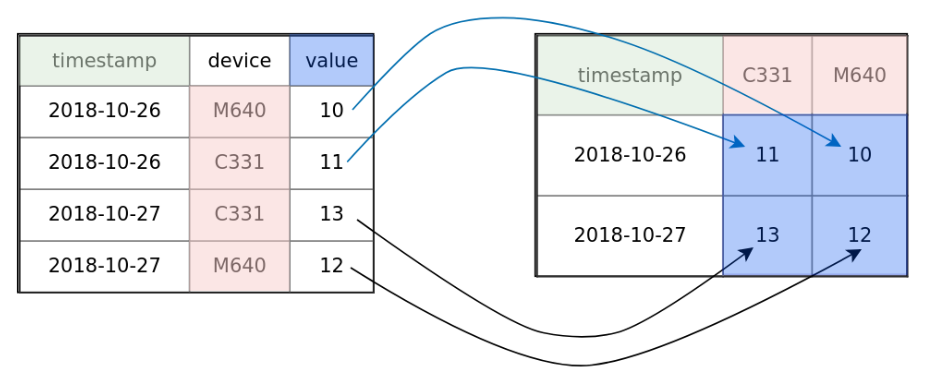

In [ ]:
pd.pivot_table(df, index='timestamp', columns='device', values='value')

# **Applying pivot_table**



```
timestamp                device value
0 2018-10-26 06:30:42.817 C331 6020.0
1 2018-10-26 06:30:43.083 M640 104.0
2 2018-10-26 06:31:00.858 M640 126.0
3 2018-10-26 06:31:10.254 C331 6068.0
4 2018-10-26 06:31:10.474 M640 136.0
```



In [ ]:
data = pd.pivot_table(data, columns="device", values="value", index="timestamp")
print(data.head()



```
device                  C331   M640
timestamp
2018-10-26 06:30:42.817 6020.0 NaN
2018-10-26 06:30:43.083 NaN 104.0
2018-10-26 06:31:00.858 NaN 126.0
2018-10-26 06:31:10.254 6068.0 NaN
2018-10-26 06:31:10.474 NaN 136.0
```
* จะมีค่า `NaN` ขึ้นมาเยอะ เพราะข้อมูลถูกบันทึกในช่วงเวลาที่ต่างกัน ต้อง downsample ให้หน่วยเป็นนาที

# **Resample**

* **`.resample()`** ต้องมี aggregation ตาม เช่น max min mean

In [ ]:
# Resample DataFrame to 1min
df = data.resample("1min").max().dropna()
print(df.head())



```
device               C331   M640
timestamp
2018-10-26 06:30:00 6020.0 104.0
2018-10-26 06:31:00 6129.0 180.0
2018-10-26 06:32:00 6205.0 256.0
2018-10-26 06:33:00 6336.0 332.0
2018-10-26 06:34:00 6431.0 402.0
```



### ***Reformat data***

Based on the data gathered in the previous exercise, you can see that you have data for 2 different areas, `area1` and `area2`. To easily compare and analyze this data, you should bring each device into its own column.

To load the data, you specify your own column names, since you did not save these with the data. After loading the data, you need to convert the timestamp. The timestamp is in milliseconds, which we need to tell **`pd.to_datetime`** by specifying **`unit="ms"`**.

You pivot the data and resample the data to 1-minute intervals since for this dataset, a more detailed analysis would not make sense.

* Convert the unix-timestamp column `ts` to datetime using unit `ms`.
* Pivot the DataFrame. The resulting DataFrame `df2` should have `ts` as index, each unique `device` used as one column header, and `val` as values.
* Resample the DataFrame to `1min` interval using `max()` as aggregation function and drop empty rows.

In [ ]:
# Replace the timestamp with the parsed timestamp
df['ts'] = pd.to_datetime(df["ts"], unit="ms")
print(df.head())

# Pivot the DataFrame
df2 = pd.pivot_table(df, columns="device", values="val", index="ts")
print(df2.head())

# Resample DataFrame to 1min
df3 = df2.resample('1min').max().dropna()
print(df3.head())

df3.to_csv(TARGET_FILE)



```
                       ts     device         val
    0 2018-10-26 06:30:43.083  area1  347069.305
    1 2018-10-26 06:31:00.858  area1  347069.381
    2 2018-10-26 06:31:10.254  area2  673204.096
    3 2018-10-26 06:31:10.474  area1  347069.416
    4 2018-10-26 06:31:19.547  area2  673204.199


    device                        area1       area2
    ts                                             
    2018-10-26 06:30:43.083  347069.305         NaN
    2018-10-26 06:31:00.858  347069.381         NaN
    2018-10-26 06:31:10.254         NaN  673204.096
    2018-10-26 06:31:10.474  347069.416         NaN
    2018-10-26 06:31:19.547         NaN  673204.199
    
    
    device                    area1       area2
    ts                                         
    2018-10-26 06:31:00  347069.571  673204.504
    2018-10-26 06:32:00  347069.834  673205.018
    2018-10-26 06:33:00  347070.098  673205.900
    2018-10-26 06:34:00  347070.339  673206.536
    2018-10-26 06:35:00  347070.585  673207.187
```
### ***Analyzing Energy counter data***

Simply plotting energy counter data will not show anything other than 2 straight lines.

The energy counter gives you a running total, but what you really care about his how much energy was consumed between each measurement.

You need to calculate the difference between 2 consecutive values to see how much energy has been consumed in each interval. Creating the percentage-change from the difference allows for easier comparison and allows new insights.

`pandas` has already been imported as `pd`, and `matplotlib.pyplot` as `plt`. The DataFrame is available as `df`.

* Create a new DataFrame called `df_diff` that contains the difference between values in consecutive rows for all columns.


In [ ]:
df_diff = df.diff()

# Plot the DataFrame
df_diff.plot()
plt.show()  


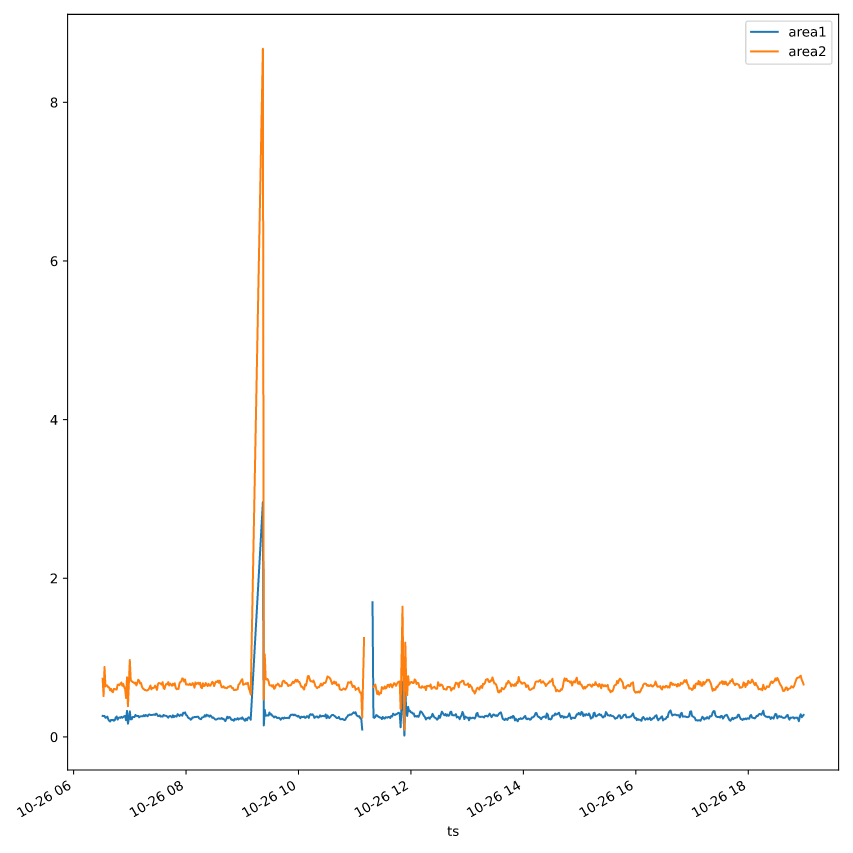
* Downsample `df` into `30` minute bins, using `max()` and store the result in `df_res` to remove noise.



In [ ]:
# Resample df to 30 minutes
df_res = df.resample('30min').max()

# Get difference between values
df_diff = df_res.diff()

# Plot the DataFrame
df_diff.plot()
plt.show()


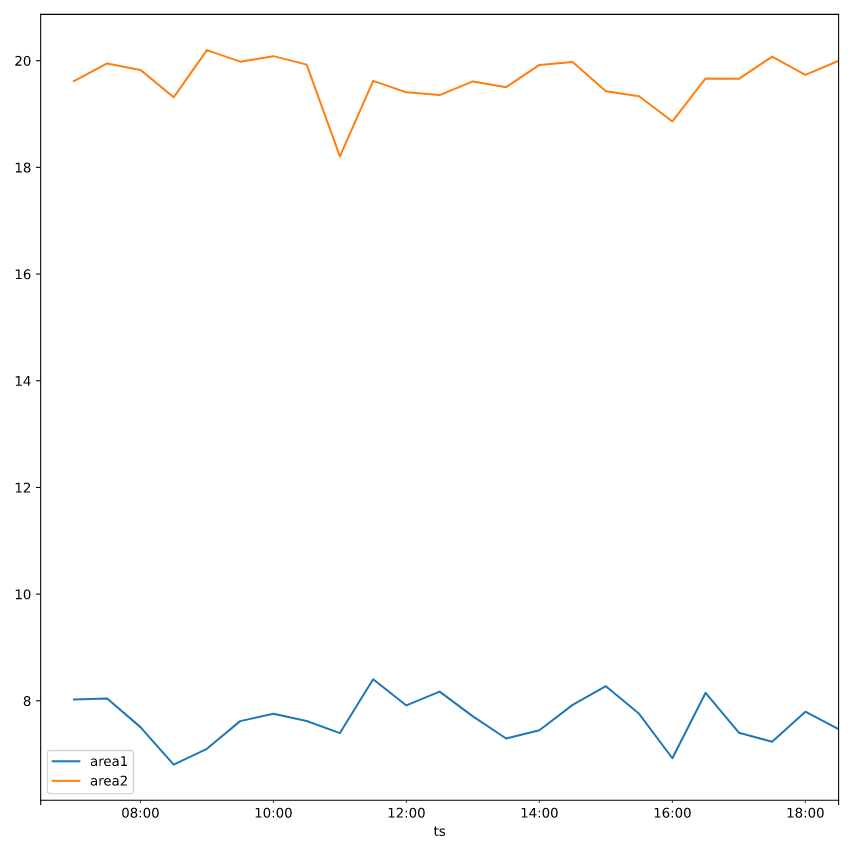


* Calculate the percentage changes between consecutive rows in `df_diff` and store the result in `df_pct`.


In [ ]:
# Get the percent changed
df_pct = df_diff.pct_change()

# Plot the DataFrame
df_pct.plot()
plt.show()

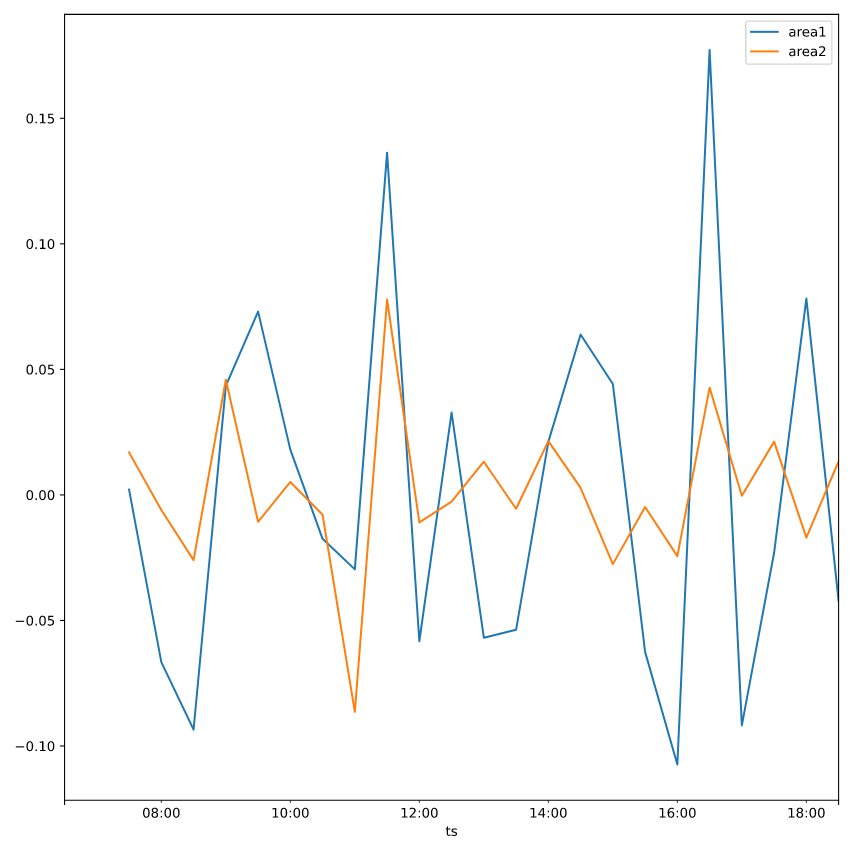

Notice that after the first Section we saw a huge spike. This is because there is some data missing. By resampling the data to 30 minute intervals, we can clearly see that `area2` has a much higher energy consumption than `area`. After visualizing the percentage change, the differences become clearer and we can see that `area1` has higher fluctuations, however we cannot see which one has a higher overall consumption.

### ***Combine and resample***

You'll now combine environmental data with a traffic dataset. The traffic consists of 2 columns, `light_veh` and `heavy_veh`.

`heavy_veh` represents the number of heavy vehicles like lorries or busses per hour on a road of a small city.

`light_veh` contains the number of light vehicles, like automobiles or motorbikes per hour on that road.

The environmental dataset consists of

* `temperature` in degree Celsius.
* `humidity` in percent.
* `sunshine` duration in seconds.

Since the traffic-dataset is in 1 hour buckets, but the environmental data is in 10 minute buckets, you'll need a way to resolve this.

The data is available as `environ` and `traffic`.



* Combine both DataFrames along the columns axis and print the head of the new DataFrame.

**`environ`**

```
                     temperature  humidity  sunshine
timestamp                                           
2018-11-01 00:00:00         10.6      78.8       0.0
2018-11-01 00:10:00         10.7      77.8       0.0
2018-11-01 00:20:00         10.8      76.9       0.0
2018-11-01 00:30:00         10.9      75.6       0.0
2018-11-01 00:40:00         10.7      77.1       0.0
...                          ...       ...       ...
2018-11-30 22:20:00         -0.6      92.2       0.0
2018-11-30 22:30:00         -0.5      92.4       0.0
2018-11-30 22:40:00         -0.7      92.8       0.0
2018-11-30 22:50:00         -0.7      93.0       0.0
2018-11-30 23:00:00         -0.7      92.4       0.0

[4289 rows x 3 columns]
```
**`traffic`**



```
                     light_veh  heavy_veh
ts                                       
2018-11-01 00:00:00          0          0
2018-11-01 01:00:00          0          0
2018-11-01 02:00:00          0          0
2018-11-01 03:00:00         21          0
2018-11-01 04:00:00         27          0
...                        ...        ...
2018-11-30 18:00:00        303         24
2018-11-30 19:00:00        193         15
2018-11-30 20:00:00        132          9
2018-11-30 21:00:00          4          0
2018-11-30 22:00:00          0          0

[719 rows x 2 columns]
```




In [ ]:
# Combine the DataFrames
environ_traffic = pd.concat([environ, traffic], axis=1)

# Print first 5 rows
print(environ_traffic.head())



```
                     temperature  humidity  sunshine  light_veh  heavy_veh
2018-11-01 00:00:00         10.6      78.8       0.0        0.0        0.0
2018-11-01 00:10:00         10.7      77.8       0.0        NaN        NaN
2018-11-01 00:20:00         10.8      76.9       0.0        NaN        NaN
2018-11-01 00:30:00         10.9      75.6       0.0        NaN        NaN
2018-11-01 00:40:00         10.7      77.1       0.0        NaN        NaN
```
* Create the aggregation
* Resample `environ_traffic` to "1h" and apply the aggregation-dict to it.


In [ ]:
# Create agg logic
agg_dict = {"temperature": "max", "humidity": "max", "sunshine": "sum", 
            "light_veh": "sum", "heavy_veh": "sum"}

# Resample the DataFrame 
environ_traffic_resampled = environ_traffic.resample('1h').agg(agg_dict)
print(environ_traffic_resampled.head())

By using a different aggregation function per column we did not lose much detail.

### ***Heatmaps***

You're going to keep working with the environmental dataset from the previous lessons. However, it now contains 3 additional columns about a river's water-status in the same geographic area.

The additional columns are:

* flow-rate in m3/s
* water-level in cm
* water-temperature in °C

You'll now try to find correlations between the columns.

`pandas` as `pd`, `seaborn` as `sns` and `matplotlib.pyplot` as `plt` have been imported for you.

* Calculate the correlation from `data` and assign it to `corr`.
* Print the correlation you just calculated.


`data`

```
                     temperature  humidity  sunshine  water-level  flow-rate  water_temp
timestamp                                                                               
2018-11-01 00:00:00         10.9      82.0       0.0           87     134.42         8.9
2018-11-01 01:00:00         10.3      91.6       0.0           76     122.40         8.9
2018-11-01 02:00:00          9.7      95.3       0.0           75     119.60         8.9
2018-11-01 03:00:00          9.5      95.8       0.0           73     116.80         8.8
2018-11-01 04:00:00          9.3      96.5       0.0           73     115.60         8.8
...                          ...       ...       ...          ...        ...         ...
2018-11-30 19:00:00          1.5      83.7       0.0           48      41.19         4.6
2018-11-30 20:00:00          1.3      87.0       0.0           59      81.35         4.7
2018-11-30 21:00:00          0.6      88.3       0.0           36      42.54         4.7
2018-11-30 22:00:00         -0.1      93.0       0.0           31      38.48         4.7
2018-11-30 23:00:00         -0.7      92.4       0.0           31       6.57         4.6

[720 rows x 6 columns]
```



In [ ]:
# Calculate correlation
corr = data.corr()

# Print correlation
print(corr)



```
             temperature  humidity  sunshine  water-level  flow-rate  water_temp
    temperature        1.000    -0.122     0.213        0.507      0.494       0.750
    humidity          -0.122     1.000    -0.472        0.106      0.158       0.424
    sunshine           0.213    -0.472     1.000        0.040      0.011      -0.130
    water-level        0.507     0.106     0.040        1.000      0.924       0.380
    flow-rate          0.494     0.158     0.011        0.924      1.000       0.393
    water_temp         0.750     0.424    -0.130        0.380      0.393       1.000
```

* Create a heatmap from the correlation and annotate the heatmap.



In [ ]:
# Create a heatmap
sns.heatmap(corr, annot=True)

# Show plot
plt.show()

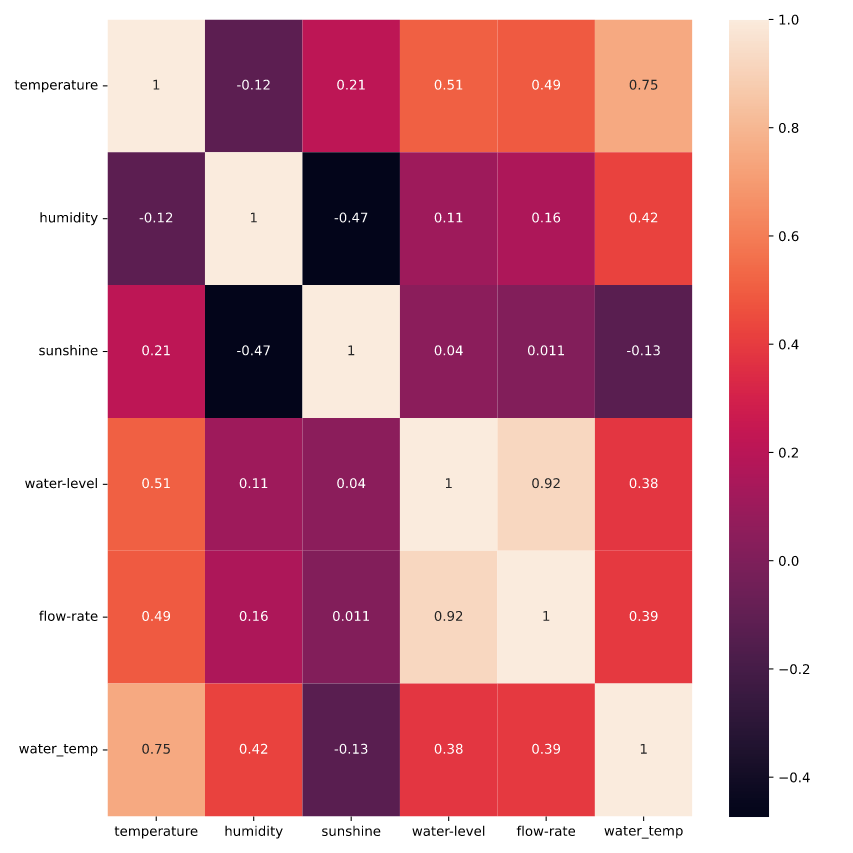



### ***Pairplot***

You'll now further investigate the data using a pairplot.

A pairplot can be a useful tool since it combines *histograms* with *scatter-plots* showing the distribution between 2 columns.

You'll work with the water-status data we've seen before.

`pandas` as `pd` and `matplotlib.pyplot` as `plt` have been imported for you, and the data is available as `data`.

`data`



```
                     water-level  flow-rate  water_temp
timestamp                                              
2018-11-01 00:00:00           87     134.42         8.9
2018-11-01 01:00:00           76     122.40         8.9
2018-11-01 02:00:00           75     119.60         8.9
2018-11-01 03:00:00           73     116.80         8.8
2018-11-01 04:00:00           73     115.60         8.8
...                          ...        ...         ...
2018-11-10 19:00:00           60      89.50         9.1
2018-11-10 20:00:00           71     104.85         9.1
2018-11-10 21:00:00           62      86.45         9.1
2018-11-10 22:00:00           71     101.85         9.1
2018-11-10 23:00:00           61      95.00         9.0

[240 rows x 3 columns]
```




* Create a pairplot from data.

In [ ]:
import seaborn as sns

# Create a pairplot
sns.pairplot(data)

# Show plot
plt.show()

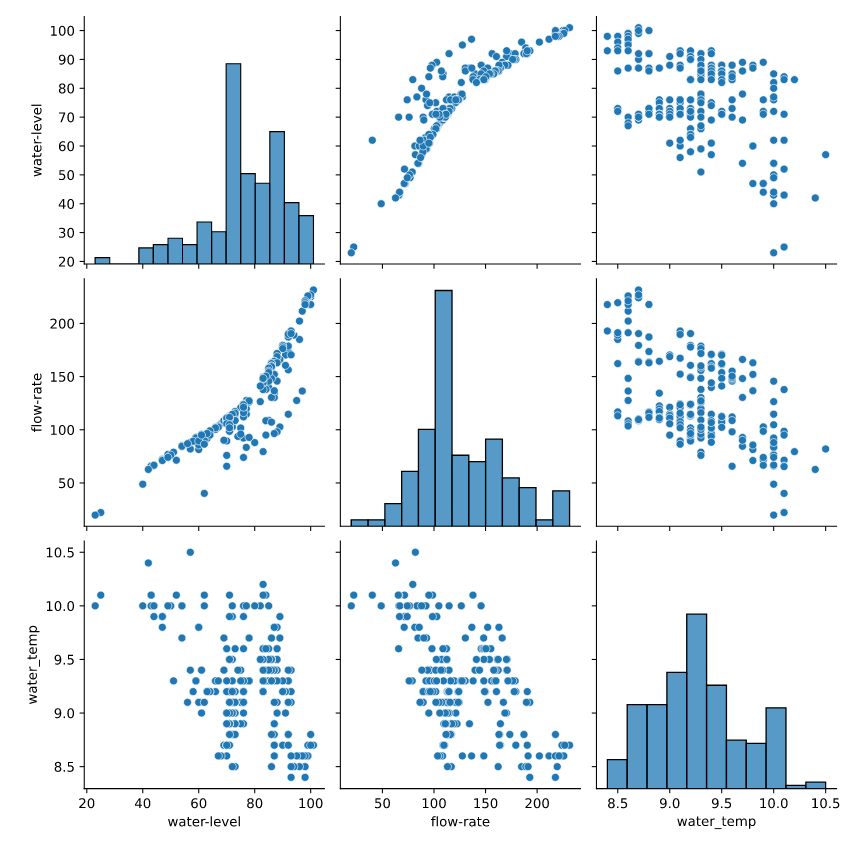

* We can see just from one pairplot that `water-level` is >50cm most of the time, 
* `water_temp` seems normally distributed and 
* `flow-rate` and `water-level` are strongly correlated.

### ***Standard deviation***

You should now be familiar with the environmental dataset. However, until now you used a cleaned version of the dataset. The original dataset contained multiple outliers, which would have tainted the analysis.

You'll now work on visualizing these outliers by using the method you've just learned.

`data`

```
                     temperature
timestamp                       
2018-11-01 00:00:00         10.6
2018-11-01 00:10:00         10.7
2018-11-01 00:20:00         10.8
2018-11-01 00:30:00         10.9
2018-11-01 00:40:00         10.7
...                          ...
2018-11-30 22:20:00         -0.6
2018-11-30 22:30:00         -0.5
2018-11-30 22:40:00         -0.7
2018-11-30 22:50:00         -0.7
2018-11-30 23:00:00         -0.7

[4289 rows x 1 columns]
```



* Calculate the mean of the `"temperature"` column and assign it to a column in `data`.

* Calculate upper and lower limits and assign each to a separate column in `data`.

* Plot `data`.

In [ ]:
# Calculate mean
data["mean"] = data['temperature'].mean()

# Calculate upper and lower limits
data["upper_limit"] = data['mean'] + (3 * data['temperature'].std())
data["lower_limit"] = data['mean'] - (3 * data['temperature'].std())

# Plot the DataFrame
data.plot()

plt.show()

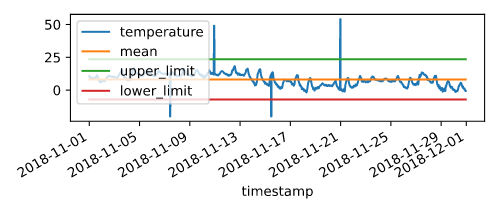

### ***Autocorrelation***

For this exercise, you'll be using the traffic dataset. I've combined the columns for heavy and light vehicles into one `"vehicle"` column, since we've seen before that the two behave as one.

You'll first plot the data, and then visualize the autocorrelation, before answering some questions about the created plots.

The data is available as `traffic`.


```
                     vehicles
ts                           
2018-11-01 00:00:00         0
2018-11-01 01:00:00         0
2018-11-01 02:00:00         0
2018-11-01 03:00:00        21
2018-11-01 04:00:00        27
...                       ...
2018-11-30 18:00:00       327
2018-11-30 19:00:00       208
2018-11-30 20:00:00       141
2018-11-30 21:00:00         4
2018-11-30 22:00:00         0

[719 rows x 1 columns]
```

* Plot the data of the traffic dataset before the `"2018-11-10"`.
* Show the plot.

In [ ]:
traffic[:"2018-11-10"].plot()
plt.show()

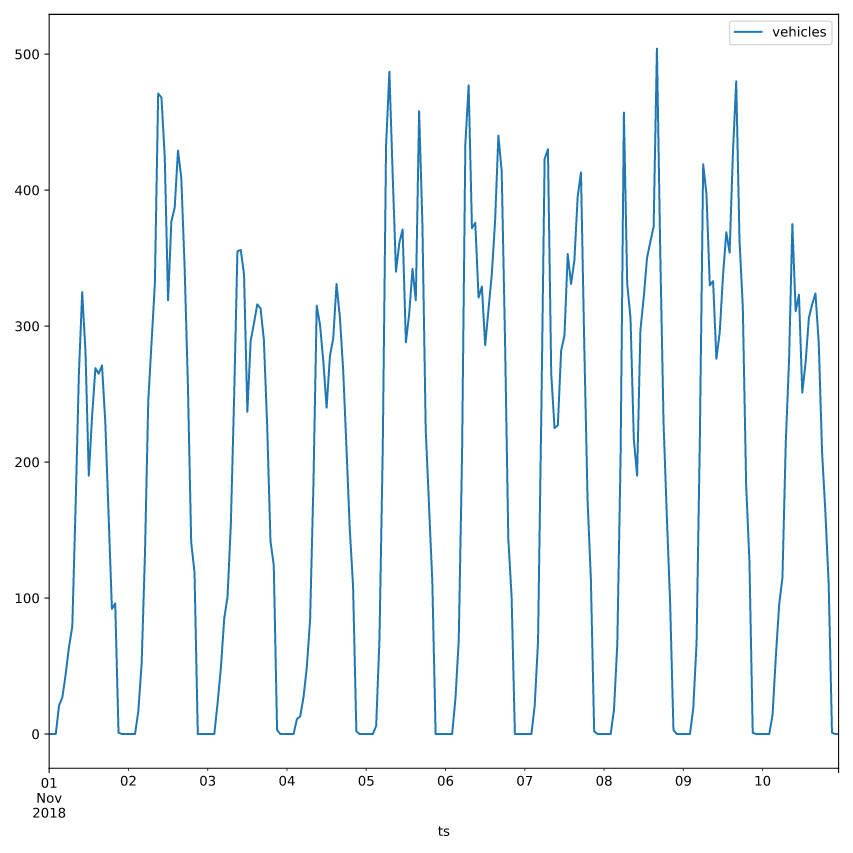

* Import **`tsaplots`** from **`statsmodels.graphics`**.
* Plot the autocorrelation of the `"vehicles"` column and limit the lags to `50`.



In [ ]:
from statsmodels.graphics import tsaplots 

# Plot autocorrelation
tsaplots.plot_acf(traffic['vehicles'], lags=50)

# Show the plot
plt.show()

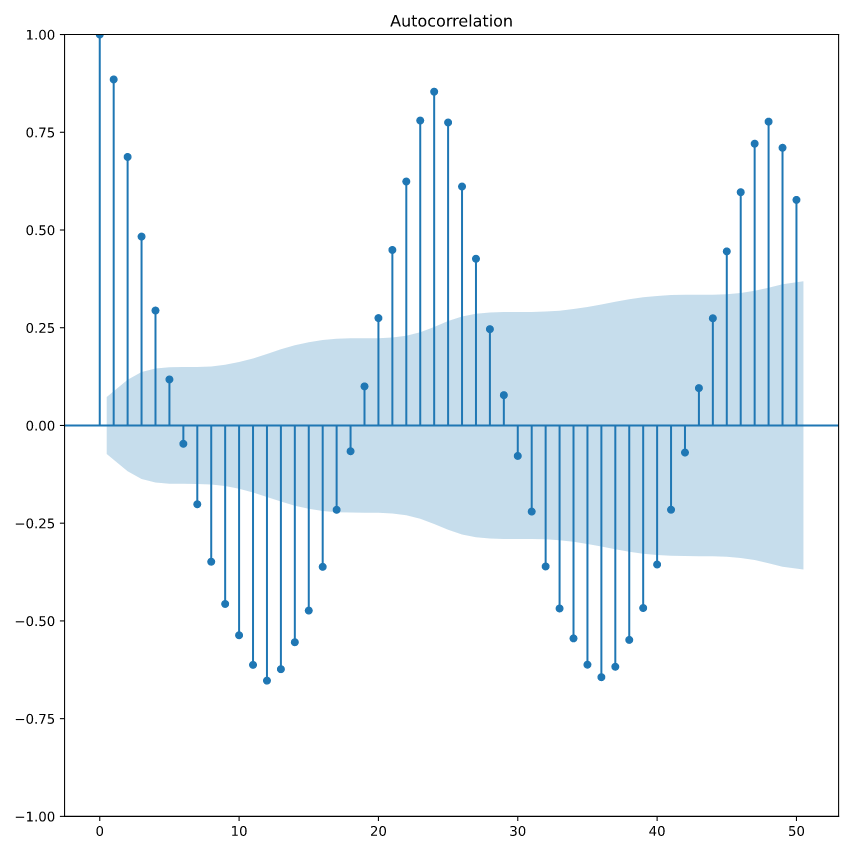

The amount of vehicles per hour is very high every 24 hours, or during lunch time - and is very low every 12 hours, or during the night.

# **Time series components**

* Trend
* Seasonal
* Residual / Noise

```
series[t] = trend[t] + seasonal[t] + residual[t]
```



# **Seasonal decompose**

In [ ]:
import statsmodels.api as sm

# Run seasonal decompose
decomp = sm.tsa.seasonal_decompose(data["temperature"])

print(decomp.seasonal.head())




```
timestamp
2018-10-01 00:00:00 -3.670394
2018-10-01 01:00:00 -3.987451
2018-10-01 02:00:00 -4.372217
2018-10-01 03:00:00 -4.534066
2018-10-01 04:00:00 -4.802165
Freq: H, Name: temperature, dtype: float64
```



In [ ]:
decomp.plot()

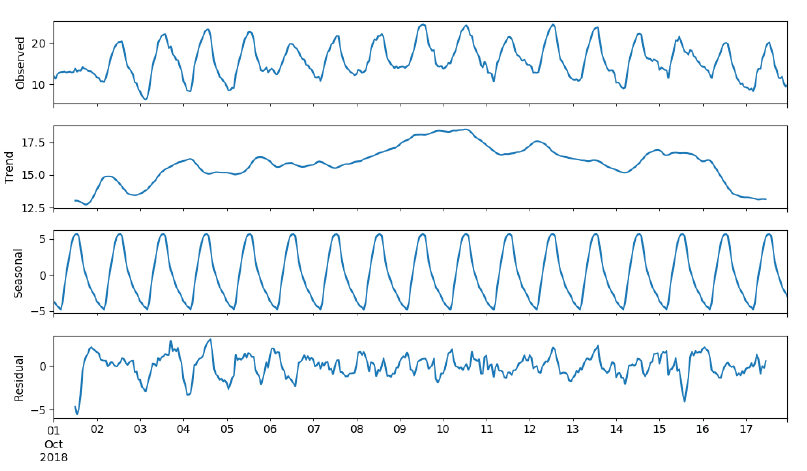

# **Combined plot**

In [ ]:
# Plot the timeseries
plt.plot(data["temperature"], label="temperature")
decomp = sm.tsa.seasonal_decompose(data["temperature"])

# Plot trend and seasonality
plt.plot(decomp.trend, label="trend")
plt.plot(decomp.seasonal, label="seasonal")
plt.show()

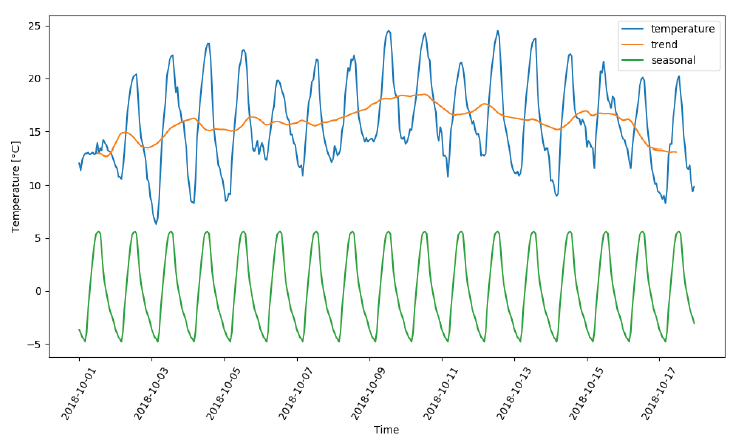

# **Train / Test split**

* เนื่องจากข้อมูล IoT เป็นอนุกรมเวลา จึงไม่สามารถทำ random split ได้
* ต้องระบุวันที่เป็นจุด cuf-off

### ***Train/Test split***

To avoid overfitting, it's common practice in Machine Learning to split data into train and test datasets. This is done to ensure that the model is able to correctly predict new, unseen data.

Since we're working with time-series data, we cannot use random split methods, as that would allow the model to know the future.

A function to print the start and end of a DataFrame is available as `show_start_end()`, which takes a DataFrame as the only argument, and returns a string.

The data is available as `environment`.


```
                     precipitation  wind-gust-speed  humidity  radiation  sunshine  wind-direction  wind-speed  pressure  temperature  target
timestamp                                                                                                                                    
2018-10-01 00:00:00            0.0              1.9      81.0        0.0       0.0           260.1        1.50    1013.4         11.8       0
2018-10-01 00:15:00            0.0              1.6      79.7        0.0       0.0           285.7        0.53    1013.1         11.9       0
2018-10-01 00:30:00            0.0              1.7      81.0        0.0       0.0           309.6        0.92    1013.0         12.1       0
2018-10-01 00:45:00            0.0              0.9      79.7        0.0       0.0           279.1        0.52    1012.7         11.7       0
2018-10-01 01:00:00            0.0              1.1      84.3        0.0       0.0           173.5        0.37    1012.6         11.2       0
...                            ...              ...       ...        ...       ...             ...         ...       ...          ...     ...
2018-10-31 22:45:00            0.0              2.8      78.3        0.0       0.0            27.6        0.92    1023.0         10.9       0
2018-10-31 23:00:00            0.0              3.5      77.2        0.0       0.0            80.2        2.27    1023.0         10.9       0
2018-10-31 23:15:00            0.0              3.7      74.7        0.0       0.0            72.3        2.71    1022.9         11.0       0
2018-10-31 23:30:00            0.0              3.6      76.0        0.0       0.0            86.1        2.18    1022.9         10.8       0
2018-10-31 23:45:00            0.0              1.1      82.2        0.0       0.0           280.1        0.21    1022.6         10.3       0

[2972 rows x 10 columns]
```


* Define the date to use as split-point as `"2018-10-27"`.
* Split the data into `train_env` and `test_env`.
* Print the start and end-dates of `train_env` and `test_env` using `show_start_end`.

* Define `X_train`, `y_train`, `X_test` and `y_test` by dropping or selecting the column `"target"`.

In [ ]:
def show_start_end(df):
    return f"from {df.iloc[0].name} to {df.iloc[-1].name}"

# Define the split day
limit_day = "2018-10-27"

# Split the data
train_env = environment[:limit_day]
test_env = environment[limit_day:]

# Print start and end dates
print(show_start_end(train_env))
print(show_start_end(test_env))

# Split the data into X and y
X_train = train_env.drop('target', axis=1)
y_train = train_env['target']
X_test = test_env.drop('target', axis=1)
y_test = test_env['target'] 



```
from 2018-10-01 00:00:00 to 2018-10-27 23:45:00
from 2018-10-27 00:00:00 to 2018-10-31 23:45:00
```

Correctly splitting the data helps to correctly evaluate the model. If the data split would be random, the model may look very good during testing and training, however it would not perform well at all on new, unseen data.

### ***Logistic Regression***

Using the data from the previous exercise, you'll now train a Machine learning model.

In line with best practices, the data is now available as `X_train`, while the labels have been loaded as `y_train`. A subset of the data is also available as `X_test`. You'll learn later in this chapter how to properly create these variables.

* Initialize the model as `logreg`.
* Fit the model to `X_train` with the labels `y_train`.
* Predict some classes using `X_test`.

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Initialize the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict classes
print(logreg.predict(X_test))



```
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
```



# **Evaluate the model**

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print(logreg.score(X_test, y_test))

# **Standard Scaler**



```
        Humidity temperature pressure
timestamp
2018-10-01 00:00:00 81.0 11.8 1013.4
2018-10-01 00:15:00 79.7 11.9 1013.1
2018-10-01 00:30:00 81.0 12.1 1013.0
2018-10-01 00:45:00 79.7 11.7 1012.7
2018-10-01 01:00:00 84.3 11.2 1012.6
```



In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(data)

print(sc.mean_)
print(sc.var_)



```
[ 71.8826716 14.17002019 1018.17042396]
[372.78261022 20.37926608 53.67519188]
```



In [ ]:
data_scaled = sc.transform(data)

# **Convert back to dataframe**

เนื่องจาก **`StandardScaler()`** ออกมาเป็น numpy array ถ้าเราจะเปลี่ยนกลับ จะทำได้ดังนี้

In [ ]:
df_scaled = pd.DataFrame(data_scaled, columns=data.columns, index=data.index)
print(data_scaled.head())



```
                    humidity temperature pressure
timestamp
2018-10-01 00:00:00 0.472215 -0.524998 -0.651134
2018-10-01 00:15:00 0.404884 -0.502847 -0.692082
2018-10-01 00:30:00 0.472215 -0.458543 -0.705731
2018-10-01 00:45:00 0.404884 -0.547150 -0.746679
2018-10-01 01:00:00 0.643132 -0.657908 -0.760329
```



### ***Model performance***

You're now going to evaluate the model from the previous lesson against the test-data.

Evaluating data against new, unseen data is important, as it proves the ability of the model to correctly estimate data it has never encountered before.

All necessary modules have been imported, and the data is available as `X_train` and `y_train`, and `X_test` and `y_test` respectively.

* Create a **`LogisticRegression`** model.
* Fit the model to `X_train` and `y_train`.
* Score the model using `X_train` and `y_train`.
* Score the model using `X_test` and `y_test`.

In [ ]:
# Create LogisticRegression model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Score the model
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))



```
0.9
0.8907185628742516
```
The model scores at 89%, so it's able to predict almost 90% of all samples correctly, in both the train and test datasets.

### ***Scaling***

Before applying a machine learning algorithm, one of the most common operations applied to the data is scaling.

Scaling data helps the algorithm converge faster. It also avoids having one feature dominate all other features.

You'll now create and inspect a standard scaler object.

The data is available as `environment`.

* Initialize it a standard scaler object as `sc`.
* Fit the scaler to environment
* Print the mean and variance the model determined.


In [ ]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
sc = StandardScaler()

# Fit the scaler
sc.fit(environment)

# Print mean and variance
print(sc.mean_)
print(sc.var_)



```
[8.57877303e+01 5.33394915e+01 6.50122930e+01 2.03150058e+02 8.25705622e-01 1.01995979e+03 8.15386051e+00]

[2.73146306e+02 1.00466257e+04 3.28983050e+04 6.70971570e+03 5.28029261e-01 4.29998990e+01 1.86842206e+01]
```

ค่า mean และ variance ตรงนี้ ยังเป็นค่าก่อนทำกัน rescale (สามารถตรวจสอบได้จาก `environment.describe()`)

### ***Scaling II***

You'll now apply a scaler to the dataset, which is available for you as `environment`.



```
                     humidity  radiation  sunshine  wind-direction  wind-speed  pressure  temperature
timestamp                                                                                            
2018-11-01 00:00:00      78.8        0.0       0.0             8.9        0.49    1022.4         10.6
2018-11-01 00:10:00      77.8        0.0       0.0           354.9        1.04    1022.5         10.7
2018-11-01 00:20:00      76.9        0.0       0.0             1.6        0.87    1022.5         10.8
2018-11-01 00:30:00      75.6        0.0       0.0             2.9        1.11    1022.5         10.9
2018-11-01 00:40:00      77.1        0.0       0.0            97.3        0.84    1022.5         10.7
...                       ...        ...       ...             ...         ...       ...          ...
2018-11-30 22:20:00      92.2        0.0       0.0           243.4        1.69    1020.7         -0.6
2018-11-30 22:30:00      92.4        0.0       0.0           249.9        1.41    1020.7         -0.5
2018-11-30 22:40:00      92.8        0.0       0.0           178.2        0.23    1020.8         -0.7
2018-11-30 22:50:00      93.0        0.0       0.0           198.2        0.39    1020.9         -0.7
2018-11-30 23:00:00      92.4        0.0       0.0           250.0        0.33    1021.0         -0.7

[4287 rows x 7 columns]
```



Remember that Scaling helps the algorithm 
* converge faster
* avoids having one dominant feature heavily influence the outcomes.

* Initialize a `StandardScaler` and store it as `sc`.
* Fit the scaler to `environment`.
* Scale `environment` and store the result as `environ_scaled`.
* Convert the scaled data back to a DataFrame, using the same columns and index than the original DataFrame.


In [ ]:
def plot_unscaled_scaled(unscaled, scaled):
    from_date = "2018-11-10"
    to_date = "2018-11-15"
    
    plt.plot(unscaled.loc[from_date:to_date,["temperature"]], label="Temperature Unscaled")
    plt.plot(unscaled.loc[from_date:to_date,["humidity"]], label="Humidity Unscaled")
    plt.plot(scaled.loc[from_date:to_date,["temperature"]], label="Temperature Scaled")
    plt.plot(scaled.loc[from_date:to_date,["humidity"]], label="Humidity Scaled")
    
    plt.xlabel("Time")
    plt.ylabel("Units")
    plt.legend()
    plt.show()

# Initialize StandardScaler
sc = StandardScaler()

# Fit the scaler
sc.fit(environment)

# Transform the data
environ_scaled = sc.transform(environment)

# Convert scaled data to DataFrame
environ_scaled = pd.DataFrame(environ_scaled, 
                              columns=environment.columns, 
                              index=environment.index)
print(environ_scaled.head())
plot_unscaled_scaled(environment, environ_scaled)



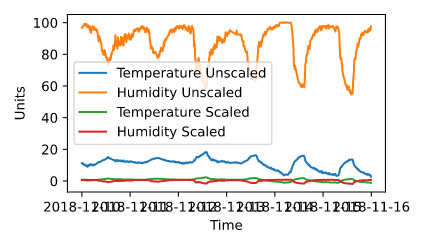

Notice that the whole data is now centered around `0`. This is clearly visible in the plot and will improve the model performance.

# **Pipeline**

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Initialize Objects
sc = StandardScaler()
logreg = LogisticRegression()

# Create pipeline
pl = Pipeline([("scale", sc), ("logreg", logreg)])
pl

Pipeline(steps=[('scale', StandardScaler()), ('logreg', LogisticRegression())])

# **Fit the Pipeline**

จะเป็นการ fit ทุกขั้นตอนใน Pipeline เข้ากับข้อมูลไปเลย

In [ ]:
pl.fit(X_train, y_train)

# **Predict Pipeline**

ขั้นตอนไหน predict ก็จะใช้ estimator ตัวนั้น

In [ ]:
pl.predict(X_test)

# **Save a model**

In [4]:
import pickle

with Path("pipeline_model.pkl").open("bw") as f: # bw คือ binary write
    pickle.dump(pl, f)

# **Load Model**



In [5]:
import pickle

with Path("pipeline_model.pkl").open('br') as f:
    pl = pickle.load(f)

pl

Pipeline(steps=[('scale', StandardScaler()), ('logreg', LogisticRegression())])

Once you store the trained model, you can transfer it to a different machine for deployment without requiring to train it again, or to use the train data again. The model is ready to be used directly for predictions.

# ***DO NOT unpickle untrusted files, this can lead to malicious code being executed.***

# **Apply to datastream**



In [ ]:
def on_message(client, userdata, message):
    data = json.loads(message.payload)
    df = pd.DataFrame.from_records([data], index="timestamp", columns=cols)
    category = pl.predict(df)
    maybe_alert(category[0])
    
subscribe.callback(on_message, topic, hostname=MQTT_HOST)

### ***Apply model to data stream***

Let's now apply your trained machine learning Pipeline to streaming data, and categorize the values immediately.

You'll then use **`predict()`** on the incoming messages to determine the category. Based on the result of the prediction you will take action, and close the windows in your house (or not).

Remember that category 1 means good weather, whereas category 0 signifies bad, cold weather.

Additionally, the pipeline returns an array of predictions. As you passed in only one element, you need to access the first element using **`category[0]`**.

The function `close_window()` will handle this for you, and will additionally log the record for further study.

`pandas` as `pd` and `json` have been preloaded the session for you, and the model is available as `pl`.

* Parse the dictionary into a pandas DataFrame with **`DataFrame.from_records()`** `"timestamp"` as index, and `cols` as columns.

* Determine the category of this record by using `predict()` from the pipeline object and assign the result to `category`.

* Call `close_window()` with the DataFrame `df` as the first argument, and `category` as the 2nd argument.

In [ ]:
def close_window(df, cat):
    print("Bad Weather. Making sure window is closed: Tem: {}, Wind-Speed: {}".format(df.iloc[0]["temperature"], df.iloc[0]["wind-speed"]))
    
def model_subscribe(client, userdata, message):
    data = json.loads(message.payload)
    # Parse to DataFrame
    df = pd.DataFrame.from_records([data], index='timestamp', columns=cols)
    # Predict result
    category = pl.predict(df)
    if category[0] < 1:
        # Call business logic
        close_window(df, category)
    else:
        print("Nice Weather, nothing to do.")  

# Subscribe model_subscribe to MQTT Topic
subscribe.callback(model_subscribe, topic, hostname=MQTT_HOST)

The model is applied to each new record, and actions are taken according to the classification.